In [81]:
# Basic Libraries
import pandas as pd
import numpy as np

#Visualziation
from matplotlib import pyplot as plt
import seaborn as sns

# machine learning
from scipy.stats import linregress
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from scipy.stats import ttest_rel
from scipy.stats import stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")  


#Set Color scheme
palette = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EC6B56", "#FFC154", "#47B39C"]



##### NULL
###### The more median income in a Zip code does not mean you will register more users for the local library

##### Alternative
###### The more median income in a Zip code means  you will register more users for the local library

## Bring in Our Data


In [82]:
#read in files
file_path = "Merge Data Folders/official.csv"

# Read the census data 
df = pd.read_csv(file_path)
df.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            9171 non-null   object 
 1   Library ID                       9171 non-null   object 
 2   Submission Year                  9171 non-null   int64  
 3   Library Name                     9171 non-null   object 
 4   Street Address                   9171 non-null   object 
 5   City                             9171 non-null   object 
 6   Zip Code                         9171 non-null   int64  
 7   Longitude                        9171 non-null   float64
 8   Latitude                         9171 non-null   float64
 9   State Code                       9171 non-null   int64  
 10  County Code                      9171 non-null   int64  
 11  County                           9171 non-null   object 
 12  County Population   

In [84]:
df.describe()

,Submission Year,Zip Code,Longitude,Latitude,State Code,County Code,County Population,Print_Collection_Expenditures,Digital_Collection_Expenditures,Total Collection Expenditures,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
count,9171.0,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9.171000e+03,9.171000e+03,9.171000e+03,9.171000e+03,...,9171.000000,9171.0,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000,9171.000000
mean,2015.0,44655.251663,-87.406308,39.788313,29.980591,80.405190,3.355800e+05,8.047747e+04,2.922712e+04,1.366578e+05,...,44655.251663,2015.0,0.209317,4.259535,0.758208,1.304667,2.498876,1.077539,0.240354,0.172124
std,0.0,28166.891757,16.847304,6.258766,14.237779,85.361436,9.003430e+05,3.404477e+05,1.670209e+05,5.992489e+05,...,28166.891757,0.0,0.445522,4.908113,1.024588,1.486645,3.067068,1.405046,0.381791,0.369608
min,2015.0,1001.000000,-170.280072,0.000000,1.000000,1.000000,2.620000e+02,-3.000000e+00,-3.000000e+00,-3.000000e+00,...,1001.000000,2015.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,14896.000000,-95.949465,37.877516,19.000000,21.000000,2.219050e+04,6.052500e+03,0.000000e+00,7.923000e+03,...,14896.000000,2015.0,0.010386,0.910904,0.107916,0.276574,0.412971,0.148232,0.018824,0.009878
50%,2015.0,49328.000000,-87.604854,41.089952,31.000000,59.000000,6.337900e+04,1.742900e+04,1.473000e+03,2.399200e+04,...,49328.000000,2015.0,0.059201,2.379487,0.344383,0.707585,1.189120,0.500637,0.084415,0.051197
75%,2015.0,66711.000000,-75.972506,42.868565,41.000000,113.000000,2.657290e+05,5.381750e+04,9.958500e+03,8.040800e+04,...,66711.000000,2015.0,0.213611,5.739097,0.999389,1.831249,3.470824,1.479661,0.300478,0.188745
max,2015.0,99929.000000,0.000000,71.298460,56.000000,840.000000,1.011670e+07,1.718262e+07,7.390207e+06,2.761352e+07,...,99929.000000,2015.0,6.841421,60.500293,8.714854,13.717390,23.740241,14.783314,4.853758,9.438945


## Collect Our Variables


In [85]:
#Calculate our Registered User to Total Population Percentage for each row
df["reg_users_perc"] = (df["Registered Users"] / df["total_population"])
df.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480


In [86]:
# Pull the median_household_income, Registered Users, Zip Code, total_population, and the reg_users_perc
df1 = df[["median_household_income","Registered Users", "Zip Code", "total_population", "reg_users_perc"]]
df1

,median_household_income,Registered Users,Zip Code,total_population,reg_users_perc
0,2497.0,396.0,99556,43043.0,0.009200
1,14107.0,119619.0,99503,46819.0,2.554924
2,160.0,161.0,99744,87708.0,0.001836
3,7869.0,1500.0,99559,72381.0,0.020724
4,4059.0,3878.0,99652,68661.0,0.056480
...,...,...,...,...,...
9166,4724.0,6073.0,82941,88320.0,0.068761
9167,16625.0,32446.0,83001,74942.0,0.432948
9168,14442.0,16279.0,82930,52894.0,0.307766
9169,7797.0,6774.0,82401,47878.0,0.141485


In [87]:
# Rename the Registered Users, and the Zip Code columns
df1 = df1.rename(columns={"Zip Code":"Zip_Code"})
df1 = df1.rename(columns={"Registered Users":"Registered_Users"})
df1

,median_household_income,Registered_Users,Zip_Code,total_population,reg_users_perc
0,2497.0,396.0,99556,43043.0,0.009200
1,14107.0,119619.0,99503,46819.0,2.554924
2,160.0,161.0,99744,87708.0,0.001836
3,7869.0,1500.0,99559,72381.0,0.020724
4,4059.0,3878.0,99652,68661.0,0.056480
...,...,...,...,...,...
9166,4724.0,6073.0,82941,88320.0,0.068761
9167,16625.0,32446.0,83001,74942.0,0.432948
9168,14442.0,16279.0,82930,52894.0,0.307766
9169,7797.0,6774.0,82401,47878.0,0.141485


In [88]:
# Create bins in which to place values based upon Median household income
bins = [0, 19999, 39999, 59999, 79999, 99999, 9999999]

# Create labels for these bins
group_labels = ["0 to 19.999k", "20k to 39.999k", "40k to 59.999k", "60k to 79.999k", "80k to 99.999k", "100k+"]

In [89]:
# Set bins to our dataframe
df1["income_bin"] = pd.cut(df1.median_household_income, bins, labels=group_labels, include_lowest=True)
df1.head()

,median_household_income,Registered_Users,Zip_Code,total_population,reg_users_perc,income_bin
0,2497.0,396.0,99556,43043.0,0.009200,0 to 19.999k
1,14107.0,119619.0,99503,46819.0,2.554924,0 to 19.999k
2,160.0,161.0,99744,87708.0,0.001836,0 to 19.999k
3,7869.0,1500.0,99559,72381.0,0.020724,0 to 19.999k
4,4059.0,3878.0,99652,68661.0,0.056480,0 to 19.999k


# Registered Users By Zip Code


In [90]:
#Find the unique zip codes in our dataframe
unique_list_zip = list(df1['Zip_Code'].unique())


unique_list_zip

[99556,
 99503,
 99744,
 99559,
 99652,
 99729,
 99615,
 99571,
 99572,
 99574,
 99921,
 99736,
 99737,
 99576,
 99701,
 99741,
 99588,
 99826,
 99827,
 99743,
 99603,
 99801,
 99610,
 99611,
 99901,
 99752,
 99627,
 99926,
 99633,
 99760,
 99639,
 99762,
 99764,
 99645,
 99832,
 99833,
 99550,
 99660,
 99663,
 99664,
 99835,
 99840,
 99669,
 99674,
 99676,
 99777,
 99841,
 99780,
 99686,
 99654,
 99688,
 99929,
 99552,
 99573,
 99753,
 99679,
 99723,
 99551,
 99829,
 99631,
 99691,
 99661,
 99579,
 99683,
 99602,
 99644,
 99591,
 99685,
 99557,
 99558,
 99590,
 99757,
 99613,
 99918,
 99919,
 99678,
 99662,
 35501,
 35541,
 35553,
 35565,
 35148,
 36264,
 36274,
 36251,
 35150,
 35960,
 35044,
 35096,
 36266,
 36203,
 35160,
 36310,
 36311,
 36345,
 36010,
 36360,
 36017,
 36048,
 36350,
 36352,
 36016,
 36081,
 36089,
 36420,
 36009,
 36323,
 36340,
 36330,
 36442,
 36344,
 36049,
 36467,
 36477,
 36375,
 36853,
 35010,
 35072,
 36830,
 36801,
 36054,
 35136,
 36078,
 36092,
 35630,


In [139]:
#Group by the same zip codes 
#zip_code_group = df2.groupby(['Zip_Code'])

#total population by zip code 
zip_pop_sum= df1["total_population"]

#total median household income by zip code
zip_income_sum = df1["median_household_income"]

#total Registered Users by zip code
zip_reg_sum = df1["Registered_Users"]

#total Registered Users Percentage by zip code
reg_users_perc_sum = df1["reg_users_perc"]


#place info into dataframe
zip_code_totals = pd.DataFrame({"median_household_income": zip_income_sum,
                                    "Registered_Users":zip_reg_sum,
                                    "total_population": zip_pop_sum,
                                    "reg_users_perc" : reg_users_perc_sum,
                                    "Zip_Code" : df1.Zip_Code})

zip_code_totals["income_bin"] = pd.cut(zip_code_totals.median_household_income, bins, labels=group_labels, include_lowest=True)
zip_code_totals

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
0,2497.0,396.0,43043.0,0.009200,99556,0 to 19.999k
1,14107.0,119619.0,46819.0,2.554924,99503,0 to 19.999k
2,160.0,161.0,87708.0,0.001836,99744,0 to 19.999k
3,7869.0,1500.0,72381.0,0.020724,99559,0 to 19.999k
4,4059.0,3878.0,68661.0,0.056480,99652,0 to 19.999k
...,...,...,...,...,...,...
9166,4724.0,6073.0,88320.0,0.068761,82941,0 to 19.999k
9167,16625.0,32446.0,74942.0,0.432948,83001,0 to 19.999k
9168,14442.0,16279.0,52894.0,0.307766,82930,0 to 19.999k
9169,7797.0,6774.0,47878.0,0.141485,82401,0 to 19.999k


In [140]:
zip_code_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   median_household_income  9171 non-null   float64 
 1   Registered_Users         9171 non-null   float64 
 2   total_population         9171 non-null   float64 
 3   reg_users_perc           9171 non-null   float64 
 4   Zip_Code                 9171 non-null   int64   
 5   income_bin               9171 non-null   category
dtypes: category(1), float64(4), int64(1)
memory usage: 367.5 KB


In [141]:
zip_code_totals.describe()

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code
count,9171.000000,9.171000e+03,9171.000000,9171.000000,9171.000000
mean,12153.131174,1.842770e+04,55084.685530,0.406863,44655.251663
std,13538.989387,7.384823e+04,21766.016486,1.669135,28166.891757
min,24.000000,-3.000000e+00,8936.000000,-0.000077,1001.000000
25%,2372.500000,1.200000e+03,41493.000000,0.023254,14896.000000
50%,6611.000000,3.890000e+03,50172.000000,0.072077,49328.000000
75%,17690.500000,1.220800e+04,62517.500000,0.226680,66711.000000
max,85700.000000,2.949870e+06,217171.000000,50.279875,99929.000000


# Find and Remove Outliers to help with our Data Comparisons

In [142]:
#Locate libraries that reported more Registered users than total poulation
mask = zip_code_totals.Registered_Users > zip_code_totals.total_population
data = zip_code_totals.loc[mask]
data

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
1,14107.0,119619.0,46819.0,2.554924,99503,0 to 19.999k
14,18900.0,56977.0,51637.0,1.103414,99701,0 to 19.999k
129,33352.0,43315.0,31331.0,1.382497,35630,20k to 39.999k
166,36098.0,60345.0,52930.0,1.140091,35216,20k to 39.999k
176,3193.0,152740.0,18283.0,8.354209,35203,0 to 19.999k
...,...,...,...,...,...,...
9054,23267.0,95338.0,36063.0,2.643651,25701,20k to 39.999k
9059,2417.0,89874.0,26350.0,3.410778,25301,0 to 19.999k
9101,14675.0,51593.0,35000.0,1.474086,25401,0 to 19.999k
9151,36974.0,74850.0,53444.0,1.400531,82001,20k to 39.999k


In [143]:
#Locate libraries that calculate to a negative percent of regestered users
mask = zip_code_totals.reg_users_perc < 0
data1 = zip_code_totals.loc[mask]
data1

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
97,2723.0,-3.0,39063.0,-0.000077,36311,0 to 19.999k
438,3280.0,-3.0,67260.0,-0.000045,85540,0 to 19.999k
3753,13160.0,-3.0,47258.0,-0.000063,4605,0 to 19.999k
4437,1269.0,-3.0,42344.0,-0.000071,63940,0 to 19.999k
4705,459.0,-3.0,51750.0,-0.000058,58351,0 to 19.999k
4733,361.0,-3.0,59643.0,-0.000050,58626,0 to 19.999k
4734,1265.0,-3.0,51136.0,-0.000059,58366,0 to 19.999k
5178,1359.0,-3.0,60272.0,-0.000050,3580,0 to 19.999k


In [144]:
# keep rows with less Registered Users than reported population
mask= zip_code_totals.Registered_Users <= zip_code_totals.total_population
zip_code_totals2= zip_code_totals.loc[mask]
zip_code_totals2

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
0,2497.0,396.0,43043.0,0.009200,99556,0 to 19.999k
2,160.0,161.0,87708.0,0.001836,99744,0 to 19.999k
3,7869.0,1500.0,72381.0,0.020724,99559,0 to 19.999k
4,4059.0,3878.0,68661.0,0.056480,99652,0 to 19.999k
5,222.0,170.0,56094.0,0.003031,99729,0 to 19.999k
...,...,...,...,...,...,...
9166,4724.0,6073.0,88320.0,0.068761,82941,0 to 19.999k
9167,16625.0,32446.0,74942.0,0.432948,83001,0 to 19.999k
9168,14442.0,16279.0,52894.0,0.307766,82930,0 to 19.999k
9169,7797.0,6774.0,47878.0,0.141485,82401,0 to 19.999k


In [145]:
zip_code_totals2.shape

(8491, 6)

In [146]:
# keep rows that are not reporting a negative percentage for the Registered Users / Population
mask= zip_code_totals2.reg_users_perc >= 0
zip_code_totals3= zip_code_totals2.loc[mask]
zip_code_totals3

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
0,2497.0,396.0,43043.0,0.009200,99556,0 to 19.999k
2,160.0,161.0,87708.0,0.001836,99744,0 to 19.999k
3,7869.0,1500.0,72381.0,0.020724,99559,0 to 19.999k
4,4059.0,3878.0,68661.0,0.056480,99652,0 to 19.999k
5,222.0,170.0,56094.0,0.003031,99729,0 to 19.999k
...,...,...,...,...,...,...
9166,4724.0,6073.0,88320.0,0.068761,82941,0 to 19.999k
9167,16625.0,32446.0,74942.0,0.432948,83001,0 to 19.999k
9168,14442.0,16279.0,52894.0,0.307766,82930,0 to 19.999k
9169,7797.0,6774.0,47878.0,0.141485,82401,0 to 19.999k


In [147]:
zip_code_totals3["reg_users_perc"]

0       0.009200
2       0.001836
3       0.020724
4       0.056480
5       0.003031
          ...   
9166    0.068761
9167    0.432948
9168    0.307766
9169    0.141485
9170    0.089119
Name: reg_users_perc, Length: 8483, dtype: float64

In [148]:
zip_code_totals3.shape

(8483, 6)

In [149]:
zip_code_totals3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8483 entries, 0 to 9170
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   median_household_income  8483 non-null   float64 
 1   Registered_Users         8483 non-null   float64 
 2   total_population         8483 non-null   float64 
 3   reg_users_perc           8483 non-null   float64 
 4   Zip_Code                 8483 non-null   int64   
 5   income_bin               8483 non-null   category
dtypes: category(1), float64(4), int64(1)
memory usage: 406.1 KB


In [150]:
zip_code_totals3["income_bin"] = pd.cut(zip_code_totals3.median_household_income, bins, labels=group_labels, include_lowest=True)
zip_code_totals3.head()

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code,income_bin
0,2497.0,396.0,43043.0,0.009200,99556,0 to 19.999k
2,160.0,161.0,87708.0,0.001836,99744,0 to 19.999k
3,7869.0,1500.0,72381.0,0.020724,99559,0 to 19.999k
4,4059.0,3878.0,68661.0,0.056480,99652,0 to 19.999k
5,222.0,170.0,56094.0,0.003031,99729,0 to 19.999k


In [151]:
zip_code_totals3.describe()

,median_household_income,Registered_Users,total_population,reg_users_perc,Zip_Code
count,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000
mean,10765.385713,7330.838383,55908.162914,0.138061,43971.672286
std,12215.453113,10141.349143,21770.345760,0.186635,28147.451591
min,24.000000,0.000000,13611.000000,0.000000,1001.000000
25%,2187.000000,1089.500000,42084.500000,0.021352,14358.000000
50%,5877.000000,3342.000000,50625.000000,0.061687,49449.000000
75%,15226.500000,9306.000000,63233.500000,0.171144,65664.000000
max,85700.000000,101154.000000,217171.000000,0.997392,99929.000000


In [152]:
#Print min and maxes of our variables
print(zip_code_totals3.median_household_income.max())
print(zip_code_totals3.median_household_income.min())
print(zip_code_totals3.reg_users_perc.max())
print(zip_code_totals3.reg_users_perc.min())

85700.0
24.0
0.9973921952128155
0.0


In [153]:
#How much data in each binary group
groups = zip_code_totals3.groupby('income_bin')

groups.size()

income_bin
0 to 19.999k      6969
20k to 39.999k    1187
40k to 59.999k     279
60k to 79.999k      46
80k to 99.999k       2
100k+                0
dtype: int64

In [154]:
data_zip_mean = zip_code_totals3.groupby('income_bin')[["median_household_income", "Registered_Users", "total_population", "reg_users_perc"]].mean()
data_zip_mean

,median_household_income,Registered_Users,total_population,reg_users_perc
income_bin,,,,
0 to 19.999k,5993.105898,4473.373655,54354.125126,0.090153
20k to 39.999k,27930.983993,18867.873631,62720.506318,0.338669
40k to 59.999k,47172.003584,25496.035842,64568.028674,0.414713
60k to 79.999k,66775.739130,30500.608696,62097.086957,0.516663
80k to 99.999k,85030.500000,49986.500000,77430.500000,0.713496
100k+,NaN,NaN,NaN,NaN


# Correlation Testing

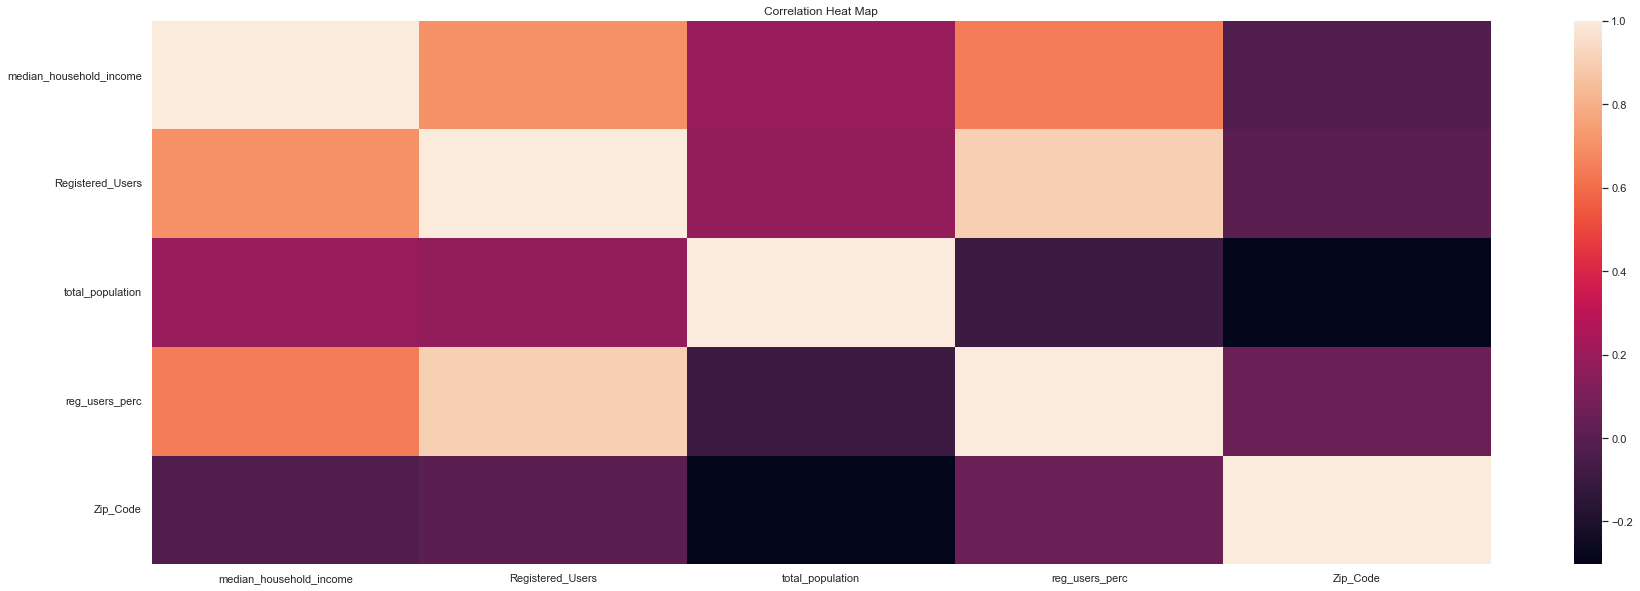

In [155]:
#correlation ratio between our columns data
corrs =zip_code_totals3.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs)
plt.title("Correlation Heat Map")
plt.show()

# Identify Outliers and Make Boxplots and Violin Plots

In [156]:
median_out = zip_code_totals3['median_household_income']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = median_out.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of median_out is: {lowerq}")
print(f"The upper quartile of median_out is: {upperq}")
print(f"The interquartile range of median_out is: {iqr}")
print(f"The the median of median_out is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of median_out is: 2187.0
The upper quartile of median_out is: 15226.5
The interquartile range of median_out is: 13039.5
The the median of median_out is: 5877.0 
Values below -17372.25 could be outliers.
Values above 34785.75 could be outliers.


In [157]:
registered_out = zip_code_totals3['reg_users_perc']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = registered_out.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of registered_out is: {lowerq}")
print(f"The upper quartile of registered_out is: {upperq}")
print(f"The interquartile range of registered_out is: {iqr}")
print(f"The the median of registered_out is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of registered_out is: 0.02135159448400182
The upper quartile of registered_out is: 0.17114445679246465
The interquartile range of registered_out is: 0.14979286230846284
The the median of registered_out is: 0.06168675660573162 
Values below -0.20333769897869244 could be outliers.
Values above 0.3958337502551589 could be outliers.


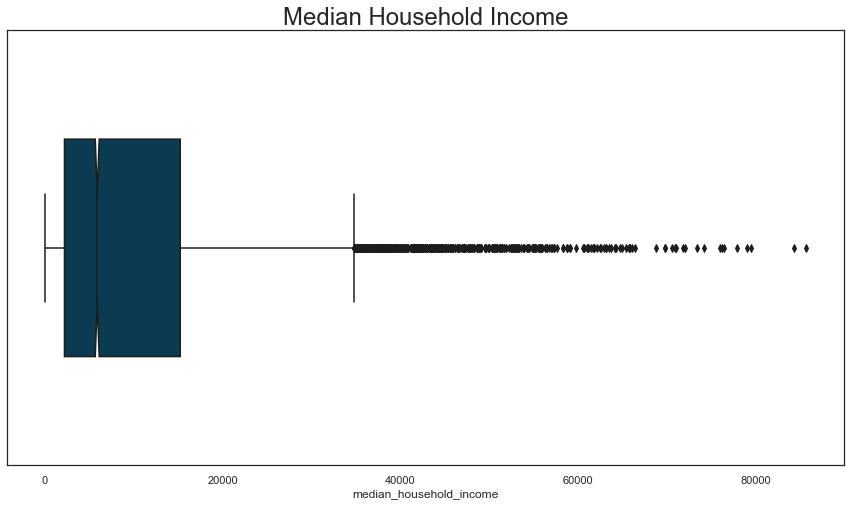

In [158]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(zip_code_totals3["median_household_income"], width=.5, notch=True, color="#003F5C")
plt.title("Median Household Income", size=24)
plt.gcf().set_size_inches(15, 8)
plt.show()

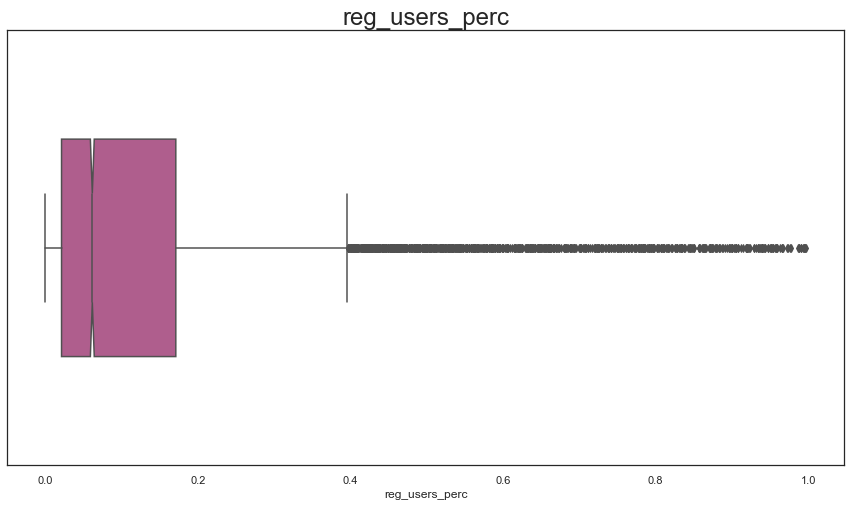

In [159]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(10,2))
sns.boxplot(zip_code_totals3["reg_users_perc"], width=.5, notch=True, color="#BC5090")
plt.title("reg_users_perc", size=24)
plt.gcf().set_size_inches(15, 8)
plt.show()

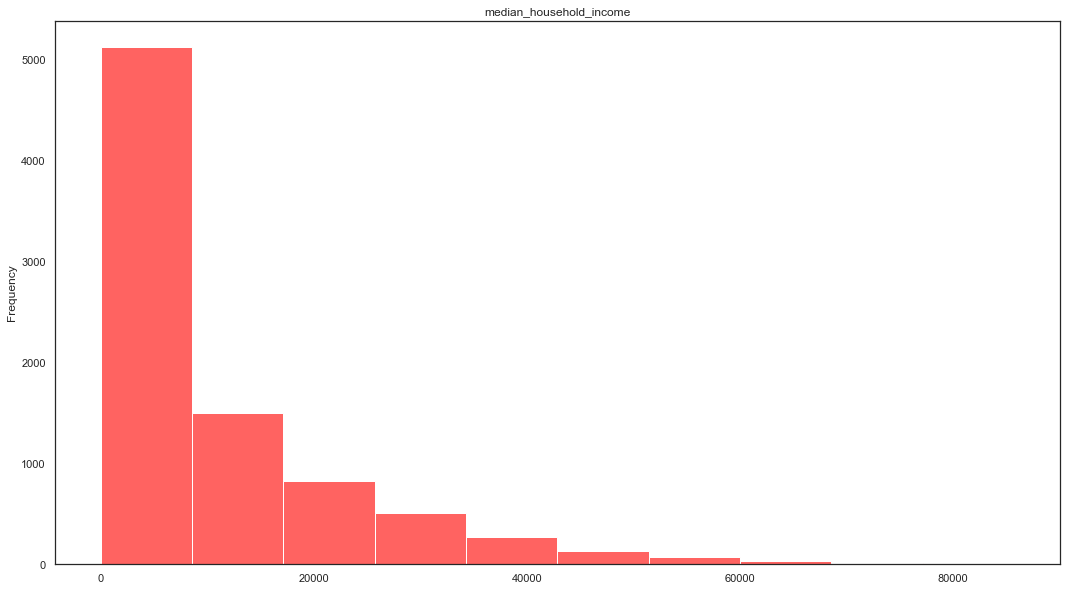

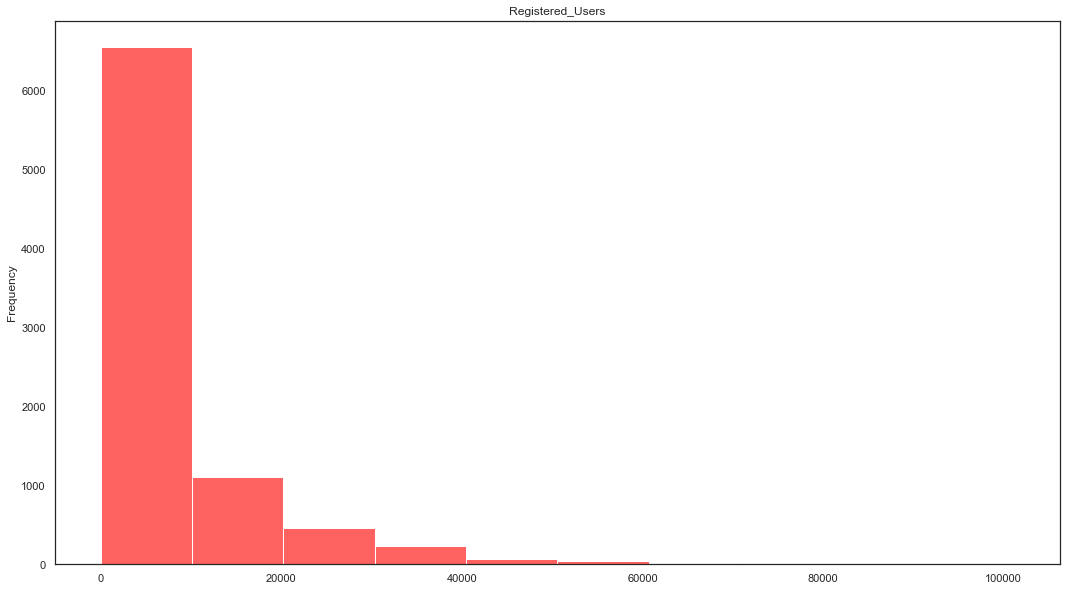

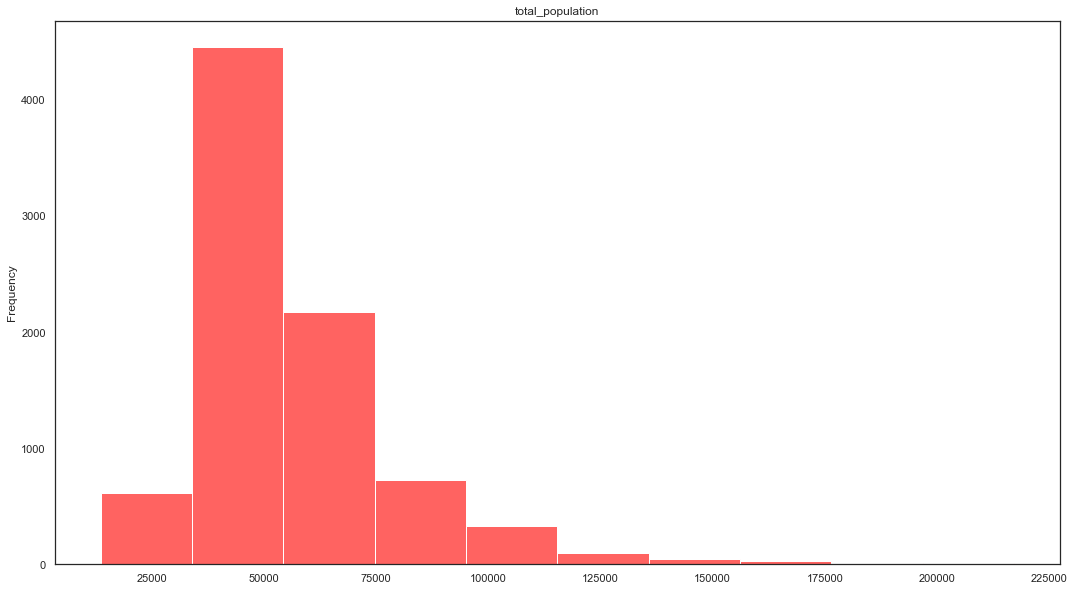

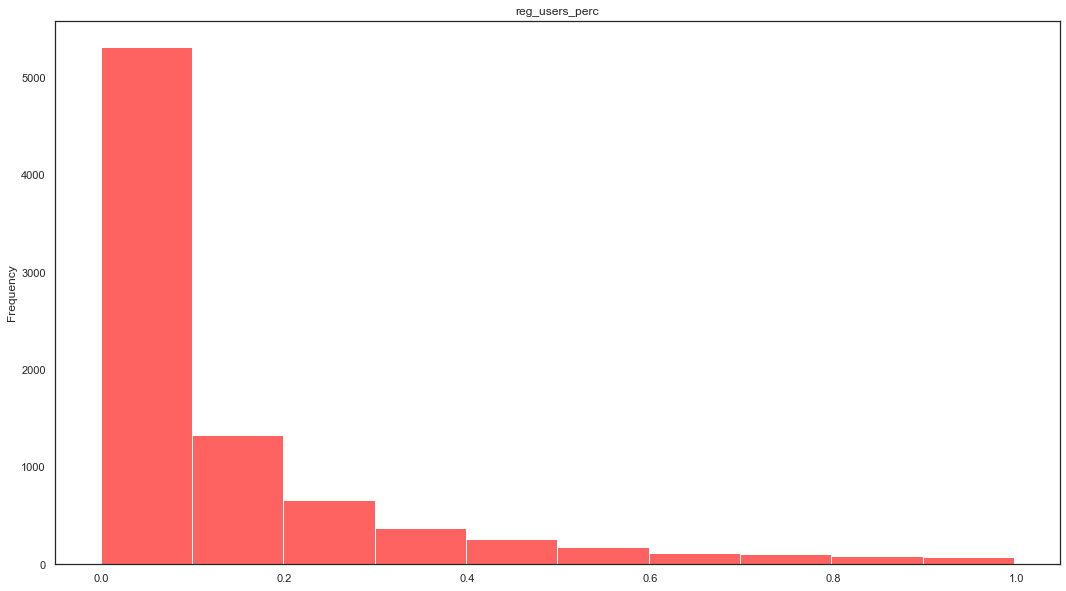

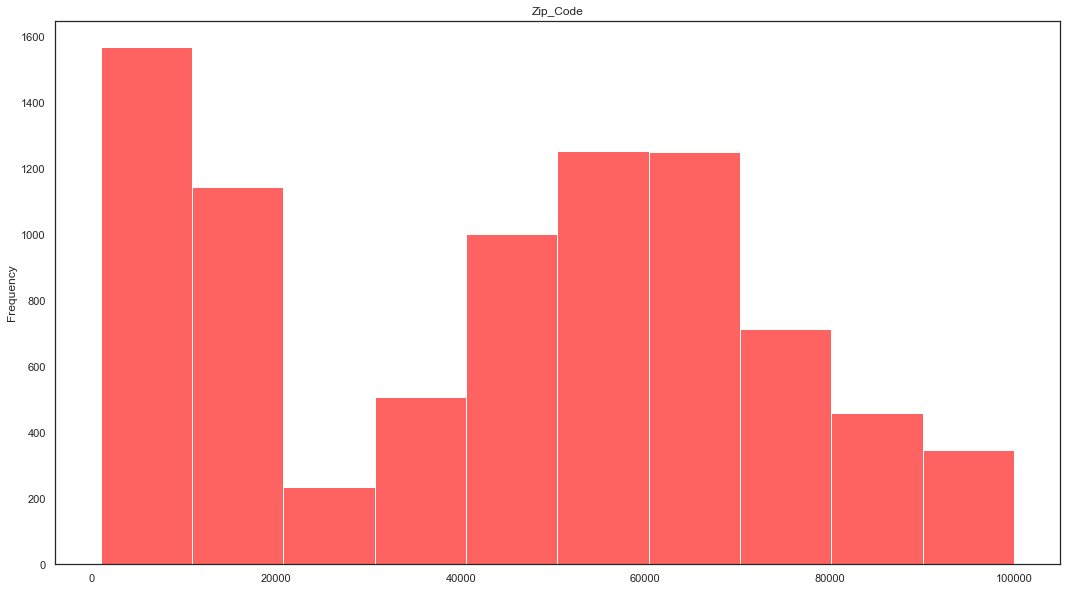

TypeError: no numeric data to plot

In [160]:
for col in zip_code_totals3.columns:
    zip_code_totals3[col].plot(kind="hist", title=col, figsize=(18,10), color="#FF6361")
    plt.show()


In [ ]:
for col in zip_code_totals3.columns:
    sns.kdeplot(data=zip_code_totals3, x=col, color="#FFA600")
    plt.show()

In [ ]:
Percentage_Registered_Population = zip_code_totals3['reg_users_perc']
median_household_income = zip_code_totals3['median_household_income']

In [ ]:
print(f"The correlation coefficient between median_household_income and Percentage_Registered_Population is {round(stats.pearsonr(median_household_income,Percentage_Registered_Population)[0],2)}")

In [ ]:
inc_violin_plot = sns.violinplot(zip_code_totals3.median_household_income,  color="#003F5C")
inc_violin_plot.set_title("Median Household Income")
plt.gcf().set_size_inches(15, 8)

In [ ]:
reg_violin_plot = sns.violinplot(zip_code_totals3["reg_users_perc"], width=1, notch=True, color="#BC5090")
reg_violin_plot.set_title("Percentage Registered by Population VIolin")
plt.gcf().set_size_inches(15, 8)

### Begin our Linear Regression Calculations 

In [ ]:
X = sm.add_constant(zip_code_totals3["median_household_income"])

Y = zip_code_totals3.reg_users_perc

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(zip_code_totals3.median_household_income, zip_code_totals3.reg_users_perc, label="% Registered", color="#EC6B56")
plt.xlabel("Income")
plt.ylabel("% Regestered Users")
plt.title("% Registered User vs Income in 2015")
plt.legend()
plt.savefig("Scatter Percent of Registered Users by Median Household Income ", bbox_inches = "tight")
plt.grid(alpha=0.05)

plt.show()

In [ ]:
median_household_income = zip_code_totals3.median_household_income
Percentage_Registered_Population = zip_code_totals3.reg_users_perc

In [ ]:
# Calculate the correlation coefficient between median household income and % of registered users
print(f"The correlation coefficient between median household income and % of registered users {round(stats.pearsonr(median_household_income,Percentage_Registered_Population)[0],2)}")

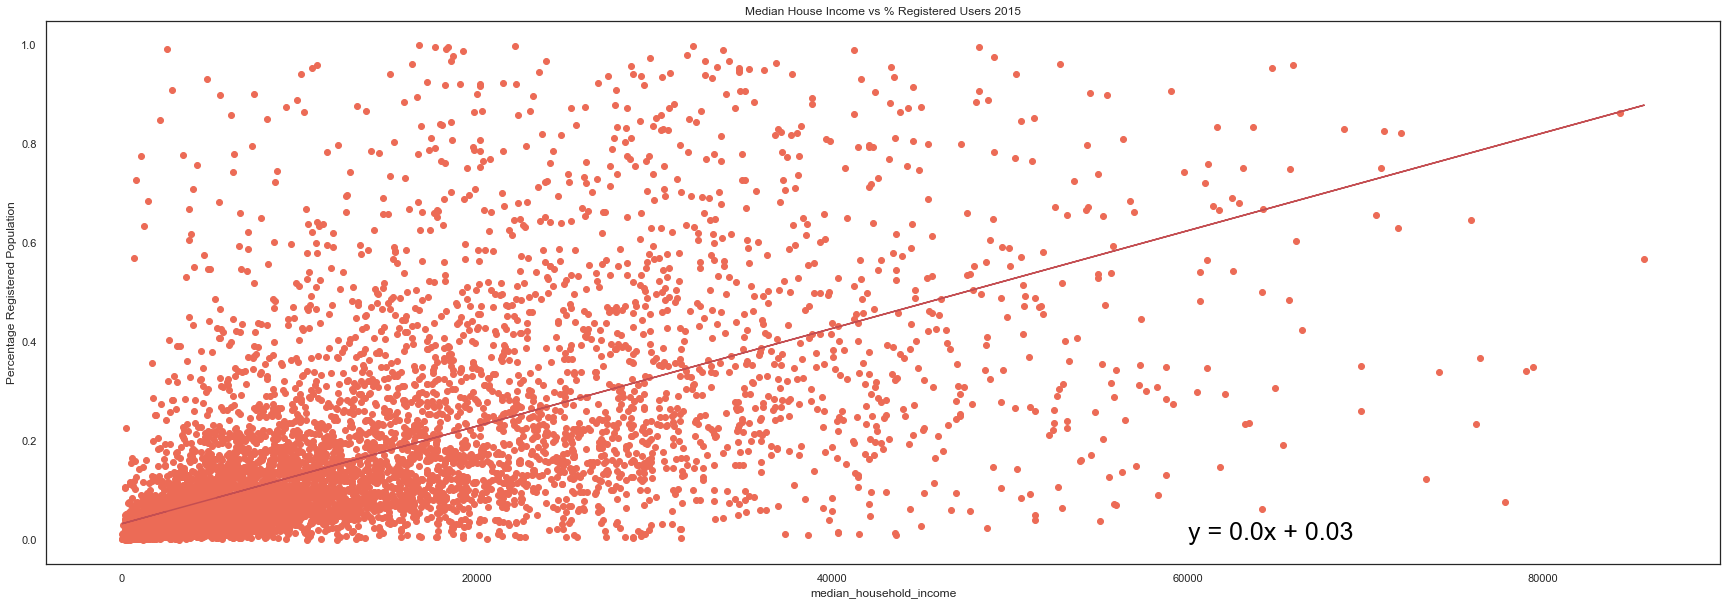

In [161]:
# Add the linear regression equation and line to plot
x_values = median_household_income
y_values = Percentage_Registered_Population
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#EC6B56")
plt.plot(x_values,regress_values,"r-")
plt.title('Median House Income vs % Registered Users 2015')
plt.annotate(line_eq,(60000,0),fontsize=25,color="black")
plt.xlabel('median_household_income')
plt.ylabel('Percentage Registered Population')
plt.savefig("Median Income to Pct Registered Users linear regression.png", bbox_inches = "tight")
plt.show()

In [162]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [163]:
linregress(x_values, y_values)

LinregressResult(slope=9.857448554996907e-06, intercept=0.03194214713511698, rvalue=0.6451816727080633, pvalue=0.0, stderr=1.267561147417621e-07, intercept_stderr=0.0020638030062990085)

In [164]:
preds = x_values * slope + intercept

preds

0       0.056556
2       0.033519
3       0.109510
4       0.071954
5       0.034131
          ...   
9166    0.078509
9167    0.195822
9168    0.174303
9169    0.108801
9170    0.084561
Name: median_household_income, Length: 8483, dtype: float64

# T-Tests

##### TTest our Median Household  Income Bins by our Registered User Percentage by population in relation to zip code.

### Assumptions

1. Data is  not normally distributed

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [165]:
unique_list_bin = list(zip_code_totals3['income_bin'].unique())


unique_list_bin

['0 to 19.999k',
 '20k to 39.999k',
 '40k to 59.999k',
 '60k to 79.999k',
 '80k to 99.999k']

In [166]:
stats.ttest_ind(zip_code_totals3['median_household_income'], zip_code_totals3['reg_users_perc'])

Ttest_indResult(statistic=81.16880973078547, pvalue=0.0)

###### FAIL TO REJECT THE NULL p > .05/.1 (I do not have enough evidence to claim a difference) - accepting the null hypothesis
###### REJECT THE NULL p < .05/.1 ( we have enough to reject the null, and accept the alternative - there is a statistically significant difference between group (in the average))

## ANOVA Test Based On Median Income Bins

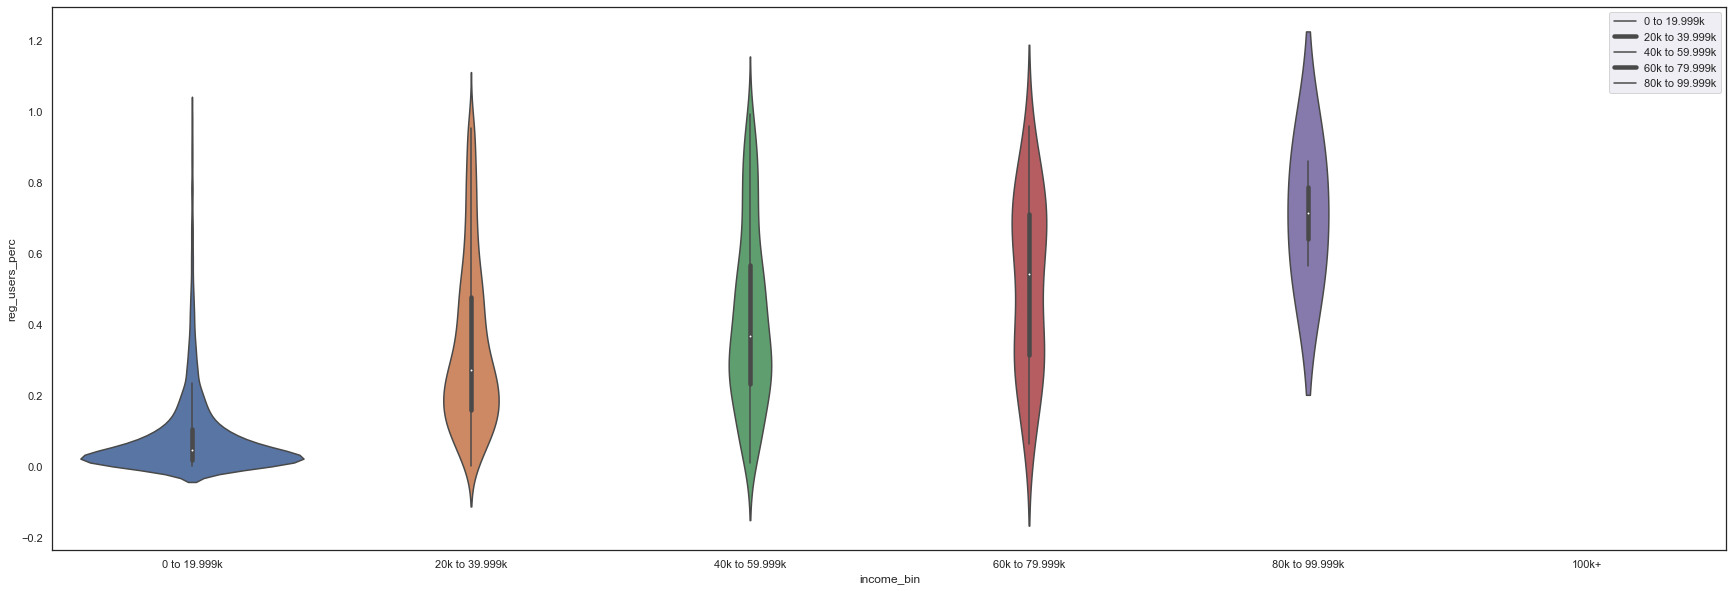

In [167]:
sns.violinplot(data=zip_code_totals3, y="reg_users_perc", x="income_bin", split=True, figsize=(25,25))
sns.set(rc={"figure.figsize":(30, 10)})
plt.legend(unique_list_bin)
plt.savefig("Median Income Bins Violin.png", bbox_inches = "tight")
plt.show()

In [168]:
zip_code_totals3.groupby("income_bin").agg({"reg_users_perc": ["mean", "std", "var", "count"]}, axis=1)

reg_users_perc                          
                         mean       std       var count
income_bin                                             
0 to 19.999k         0.090153  0.129436  0.016754  6969
20k to 39.999k       0.338669  0.236615  0.055987  1187
40k to 59.999k       0.414713  0.248361  0.061683   279
60k to 79.999k       0.516663  0.246899  0.060959    46
80k to 99.999k       0.713496  0.209156  0.043746     2
100k+                     NaN       NaN       NaN     0

In [169]:
# Extract individual groups
group1 = zip_code_totals3[zip_code_totals3["income_bin"] == "0 to 19.999k"]["reg_users_perc"]
group2 = zip_code_totals3[zip_code_totals3["income_bin"] == "20 to 39.999k"]["reg_users_perc"]
group3 = zip_code_totals3[zip_code_totals3["income_bin"] == "40k to 59.999k"]["reg_users_perc"]
group4 = zip_code_totals3[zip_code_totals3["income_bin"] == "60 to 79.999k"]["reg_users_perc"]
group5 = zip_code_totals3[zip_code_totals3["income_bin"] == "80 to 99.999k"]["reg_users_perc"]

In [170]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=nan, pvalue=nan)

In [171]:
print(stats.ttest_ind(group1, group2, equal_var=False, nan_policy="omit"))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))
print(stats.ttest_ind(group1, group5, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))
print(stats.ttest_ind(group2, group5, equal_var=False))

print(stats.ttest_ind(group3, group4, equal_var=True))
print(stats.ttest_ind(group3, group5, equal_var=False))

print(stats.ttest_ind(group4, group5, equal_var=False))

Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-21.710224660727953, pvalue=2.7918018394070635e-62)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)


In [172]:
print(stats.ttest_ind(group1, group3, equal_var=False))

Ttest_indResult(statistic=-21.710224660727953, pvalue=2.7918018394070635e-62)


## Print Outlier Graph per State

In [173]:
# Pull the median_household_income, Registered Users, Zip Code, total_population, and the reg_users_perc
df5 = df[["median_household_income","Registered Users", "Zip Code", "total_population", "reg_users_perc", "State"]]
df5

,median_household_income,Registered Users,Zip Code,total_population,reg_users_perc,State
0,2497.0,396.0,99556,43043.0,0.009200,AK
1,14107.0,119619.0,99503,46819.0,2.554924,AK
2,160.0,161.0,99744,87708.0,0.001836,AK
3,7869.0,1500.0,99559,72381.0,0.020724,AK
4,4059.0,3878.0,99652,68661.0,0.056480,AK
...,...,...,...,...,...,...
9166,4724.0,6073.0,82941,88320.0,0.068761,WY
9167,16625.0,32446.0,83001,74942.0,0.432948,WY
9168,14442.0,16279.0,82930,52894.0,0.307766,WY
9169,7797.0,6774.0,82401,47878.0,0.141485,WY


In [174]:
# Rename the Registered Users, and the Zip Code columns
df5 = df5.rename(columns={"Zip Code":"Zip_Code"})
df5 = df5.rename(columns={"Registered Users":"Registered_Users"})
df5

,median_household_income,Registered_Users,Zip_Code,total_population,reg_users_perc,State
0,2497.0,396.0,99556,43043.0,0.009200,AK
1,14107.0,119619.0,99503,46819.0,2.554924,AK
2,160.0,161.0,99744,87708.0,0.001836,AK
3,7869.0,1500.0,99559,72381.0,0.020724,AK
4,4059.0,3878.0,99652,68661.0,0.056480,AK
...,...,...,...,...,...,...
9166,4724.0,6073.0,82941,88320.0,0.068761,WY
9167,16625.0,32446.0,83001,74942.0,0.432948,WY
9168,14442.0,16279.0,82930,52894.0,0.307766,WY
9169,7797.0,6774.0,82401,47878.0,0.141485,WY


In [175]:
#Group by the same zip codes 
state_group = df5.groupby(['State'])

#total population by zip code 
state_pop_sum= df5["total_population"]

#total median household income by zip code
state_income_sum = df5["median_household_income"]

#total Registered Users by zip code
state_reg_sum = df5["Registered_Users"]

#total Registered Users Percentage by zip code
state_users_perc_sum = df5["reg_users_perc"]


#place info into dataframe
state_totals = pd.DataFrame({"median_household_income": state_income_sum,
                                    "Registered_Users": state_reg_sum,
                                    "total_population": state_pop_sum,
                                    "reg_users_perc" : state_users_perc_sum,
                                    "State" : df5.State})

state_totals["income_bin"] = pd.cut(state_totals.median_household_income, bins, labels=group_labels, include_lowest=True)
state_totals.head()

,median_household_income,Registered_Users,total_population,reg_users_perc,State,income_bin
0,2497.0,396.0,43043.0,0.009200,AK,0 to 19.999k
1,14107.0,119619.0,46819.0,2.554924,AK,0 to 19.999k
2,160.0,161.0,87708.0,0.001836,AK,0 to 19.999k
3,7869.0,1500.0,72381.0,0.020724,AK,0 to 19.999k
4,4059.0,3878.0,68661.0,0.056480,AK,0 to 19.999k


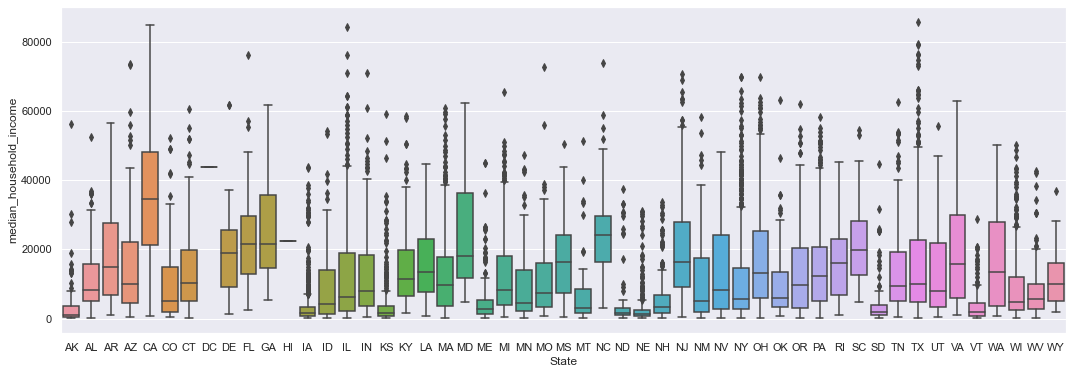

In [176]:
plt.figure(figsize = (18,6))
ax = sns.boxplot(x='State', y="median_household_income" , data = state_totals)

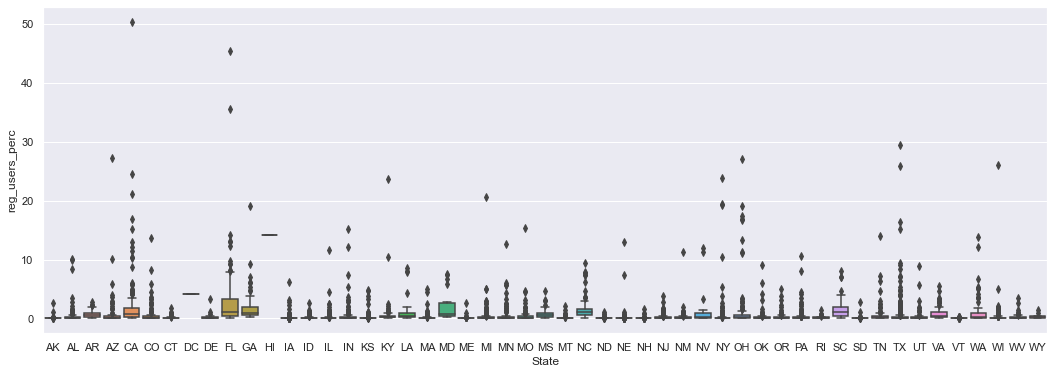

In [177]:
plt.figure(figsize = (18,6))
ax = sns.boxplot(x='State', y="reg_users_perc" , data = state_totals)